In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

In [3]:
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

In [4]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [5]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [23]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W)  
    return W

In [24]:
X_st = X.copy().astype(np.float64)

In [25]:
for i in range(X_st.shape[0]):
    if i != 0:
        X_st[i] =  calc_std_feat(X_st[i])

In [26]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
        -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

## Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

In [27]:
eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

array([57.39713014,  6.12102515,  1.4301203 ,  4.11587451])

In [28]:
n = 21
coeffs = np.zeros((n, X_st.shape[0]))
lambda_list = np.logspace(-3, 1, n)
for i, val in enumerate(lambda_list):
    W = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-4, lambda_=val)
    coeffs[i, :] = W

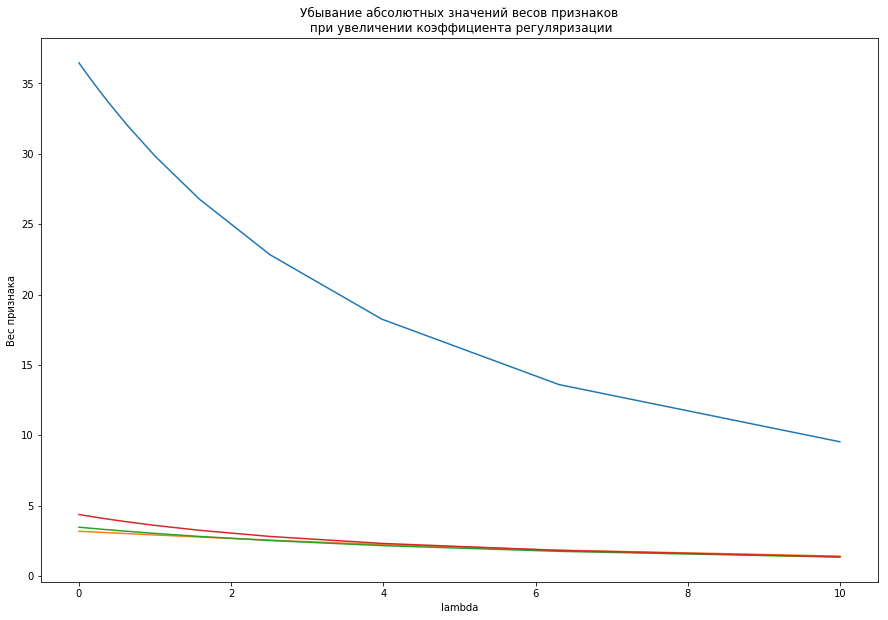

In [29]:
plt.figure(figsize=(15, 10))
for i in range(X_st.shape[0]):
    plt.plot(lambda_list, coeffs[:, i])
plt.title('Убывание абсолютных значений весов признаков\n при увеличении коэффициента регуляризации')
plt.xlabel('lambda')
plt.ylabel('Вес признака');

## 2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Только если сделать копию признака. Нормализация предполагает, что значения признака будут находиться в интервале от нуля до единицы, а стандартизация, что средние значения будут равны нулю, а остальные будут симметрично распределены слева и справа оси ординат.

## 3*. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [45]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
#     W = np.array([0.1, 0, 0.5, 0.6])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        if 0 in W:
            break
        else:
            W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W / abs(W)) 
        if i % (iterations / 10) == 0:
            print(W, err)
    return W

In [ ]:
eval_model_reg1(X_st, y, iterations=500000, alpha=1e-4, lambda_=1e-6)

[57.39741868  5.10672261  2.46090036  4.08738483] 39.98116275558151
